In [83]:
import pandas as pd
import numpy as np
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten

# import autokeras as ak


x_train = pd.read_csv("images.csv", delimiter=",").values / 255.0
y_train = pd.read_csv("labels.csv", delimiter=",").values

x_train = x_train.reshape(-1, 50,40,1)


In [84]:
import pandas as pd
import numpy as np
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split as tts

In [87]:
x_train = pd.read_csv("media/classifier_symbols/images.csv", delimiter=",").values 
y_train = pd.read_csv("media/classifier_symbols/labels.csv", delimiter=",").values
x_train,x_test,y_train,y_test = tts(x_train,y_train, shuffle = True, random_state = 2)


In [112]:
knc = KNC(n_neighbors=20)
knc.fit(x_train,y_train)
knc.score(x_test,y_test)
# from sklearn.ensemble import AdaBoostClassifier as ABC
# from sklearn.svm import SVC as ABC
# abc = ABC()
# abc.fit(x_train,y_train)
# abc.score(x_test,y_test)
from sklearn.ensemble import RandomForestClassifier  as DTC
dtc = DTC(n_estimators = 26)
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

/home/ashish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/ashish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9466666666666667

In [36]:
x_test.shape
# !pip install Xlib

(250, 2000)

In [116]:
import numpy as np
import cv2
import pandas as pd
import time
import pyautogui


def preprocess(action_frame, frame):
    blur = cv2.GaussianBlur(action_frame, (3, 3), 0)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

    ## Some more values to try
    # lower_color = np.array([0, 23, 82])
    # upper_color = np.array([40, 100, 255])
    lower_color = np.array([0, 10, 60], dtype="uint8")
    upper_color = np.array([20, 150, 255], dtype="uint8")

    mask = cv2.inRange(hsv, lower_color, upper_color)
    blur = cv2.medianBlur(mask, 3)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    hsv_d = cv2.dilate(blur, kernel)
    # cv2.morphologyEx(hsv_d, )
    hsv_d = cv2.dilate(blur, kernel)

    # hsv_d = cv2.morphologyEx(hsv_d, cv2.MORPH_CLOSE, kernel)
    return hsv_d

# cap = cv2.VideoCapture("media/cameraRoll.mp4")
cap = cv2.VideoCapture(0)

save = False

momentum = 0
ypred_old = 0
beta = 0.9

while (True):
    reading, image = cap.read()
    if not reading:
        break

    # code for thresholding the hand
    _, frame = cap.read()
    k = cv2.waitKey(1) & 0xFF

    # we need a bounding box and region of interest for the hand
    w, h, topx, topy = (100, 100, 50, 150)
    roi = frame[topx:topx + 2 * h, topy:topy + 2 * w].copy()

    roi = preprocess(roi, frame)

    cv2.imshow('ROI', roi)
#     cv2.imshow('Image', frame)
    if k == 27 or k == ord('q'):
        break

        
    # Implementing idea of momentum ( A RMS Prop algorithm for smooth predictions ) 
    momentum = beta*ypred_old + (1-beta)*ypred
       
    roi = cv2.resize(roi, (50, 40), interpolation=1)
    roi = roi.reshape(2000,)
    ypred = dtc.predict(roi.reshape(-1,2000))
    ypred_old = ypred
#     print(ypred, end = " ")
    if(np.ceil(momentum)==1):
        print("open", end = " ")
        
    elif np.ceil(momentum) == 2:
        print("new symbol", end = " ")
#         pyautogui.press('space')
        cv2.putText(frame,"UP", (80,80), cv2.FONT_HERSHEY_SIMPLEX, 2, 2, 2)
    else:
        print("close", end = " ")
        
        
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q') or key == ord('Q'):
        break

cap.release()
cv2.destroyAllWindows()


open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open open close close open open open open open open open open open open open close close close close close close close close close close close close new symbol new symbol open new symbol new symbol close close new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol close close new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol close new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol new symbol

In [117]:
import cv2

import matplotlib.pyplot as plt
import numpy as np
x_train = pd.read_csv("media/classifier_symbols/images.csv", delimiter=",").values 

image = x_train[0]
image


array([255, 255, 255, ..., 255, 255, 255])

In [118]:
# x_train[0].reshape( 50,40,1).shape

x_train[0]

array([255, 255, 255, ..., 255, 255, 255])

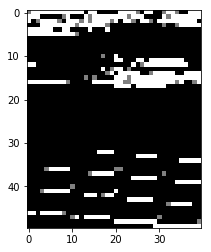